In [111]:
import pandas as pd

In [112]:
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Fake_News_Classifier/train.csv")

In [113]:
# df['text'][0] 

In [114]:
# df
X=df.drop('label',axis=1)

In [115]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [116]:
y=df['label']

In [117]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [118]:
df.shape

(20800, 5)

In [119]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer


In [120]:
df=df.dropna()

In [121]:
df.shape
messages=df.copy()

In [122]:
# df.head(10)
messages=messages.reset_index(inplace=False)

In [123]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [169]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [176]:
ps=PorterStemmer()
ws=WordNetLemmatizer()
corpus=[]

for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ws.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [177]:
#bag of words
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))#ngram_range
X=tfidf.fit_transform(corpus).toarray()

In [178]:
X.shape

(18285, 5000)

In [179]:
y=messages['label']

In [180]:
y.shape

(18285,)

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [182]:
X_train.shape

(12250, 5000)

In [183]:
X_test.shape

(6035, 5000)

In [184]:
tfidf.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [186]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [187]:
import matplotlib.pyplot as plt

In [188]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB


In [189]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [190]:
from sklearn import metrics
import numpy as np
import itertools

In [191]:
classifier.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [192]:
pred=classifier.predict(X_test)

In [193]:
accuracy=metrics.accuracy_score(y_test,pred)
accuracy

0.8821872410936206

In [194]:
cm=metrics.confusion_matrix(y_test,pred)

In [195]:
cm

array([[3208,  181],
       [ 530, 2116]])

Confusion matrix, without normalization
[[3208  181]
 [ 530 2116]]


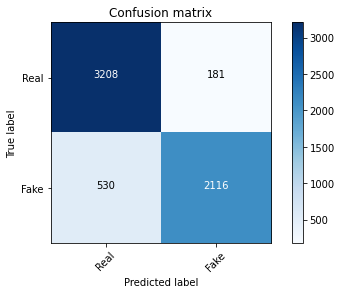

In [196]:
plot_confusion_matrix(cm,classes=['Real','Fake'])

**Passive Aggresive Classifier**

In [197]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [198]:
linear_clf=PassiveAggressiveClassifier(n_iter_no_change=50)

In [199]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=50,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

0.9106876553438277
Confusion matrix, without normalization
[[3098  291]
 [ 248 2398]]


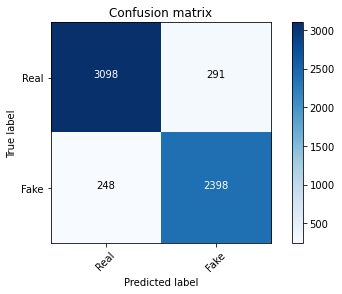

In [200]:
pred=linear_clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test,pred)
print(accuracy)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Real','Fake'])

Multinomial Classifier with hyperparameters

In [203]:
previous_score=0
for alpha in np.arange(0,0.5,0.01):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,y_train)
  pred=sub_classifier.predict(X_test)
  score=metrics.accuracy_score(y_test,pred)
  if score>previous_score:
    classifier=sub_classifier
  print("Alpha: {}, Score: {}".format(alpha,score))
  
  # print(accuracy)
  # cm=metrics.confusion_matrix(y_test,pred)
  # plot_confusion_matrix(cm,classes=['Real','Fake'])




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score: 0.8611433305716653
Alpha: 0.01, Score: 0.8699254349627175
Alpha: 0.02, Score: 0.8705882352941177
Alpha: 0.03, Score: 0.8710853355426678
Alpha: 0.04, Score: 0.8720795360397681
Alpha: 0.05, Score: 0.8732394366197183
Alpha: 0.06, Score: 0.8735708367854184
Alpha: 0.07, Score: 0.8737365368682685
Alpha: 0.08, Score: 0.8743993371996686
Alpha: 0.09, Score: 0.8745650372825187
Alpha: 0.1, Score: 0.8752278376139188
Alpha: 0.11, Score: 0.8752278376139188
Alpha: 0.12, Score: 0.8752278376139188
Alpha: 0.13, Score: 0.875724937862469
Alpha: 0.14, Score: 0.8750621375310688
Alpha: 0.15, Score: 0.8752278376139188
Alpha: 0.16, Score: 0.8755592377796189
Alpha: 0.17, Score: 0.875890637945319
Alpha: 0.18, Score: 0.875890637945319
Alpha: 0.19, Score: 0.875890637945319
Alpha: 0.2, Score: 0.8762220381110191
Alpha: 0.21, Score: 0.8763877381938691
Alpha: 0.22, Score: 0.8765534382767192
Alpha: 0.23, Score: 0.8768848384424193
Alpha: 0.24, Score: 0.8773819386909694
Alpha: 0.25, Score: 0.8773819386

In [162]:
##get feature names
feature_names=cv.get_feature_names()

In [163]:
classifier.coef_[0]

array([ -9.09965961,  -8.62203205,  -9.09965961, ..., -10.79425533,
        -8.91394246,  -9.32791826])

In [165]:
##most real words
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-3.9994199281874554, 'trump'),
 (-4.287143466026011, 'hillari'),
 (-4.395660392643989, 'clinton'),
 (-4.899240497791205, 'elect'),
 (-5.175869372480226, 'new'),
 (-5.234001137931237, 'comment'),
 (-5.273238952556101, 'video'),
 (-5.3860875397004815, 'war'),
 (-5.396092625661444, 'us'),
 (-5.411290486570875, 'hillari clinton'),
 (-5.416408205007856, 'fbi'),
 (-5.47995525612455, 'vote'),
 (-5.565526247437875, 'email'),
 (-5.577509614324971, 'world'),
 (-5.633286151782383, 'obama'),
 (-5.733772227355374, 'donald'),
 (-5.762366026722114, 'donald trump'),
 (-5.784361048307661, 'russia'),
 (-5.845495436801029, 'day'),
 (-5.861381394389839, 'america')]

In [166]:
##most fake words
sorted(zip(classifier.coef_[0],feature_names),reverse=False)[:20]

[(-10.794255327179197, 'abe'),
 (-10.794255327179197, 'abroad'),
 (-10.794255327179197, 'abus new'),
 (-10.794255327179197, 'abus new york'),
 (-10.794255327179197, 'act new'),
 (-10.794255327179197, 'act new york'),
 (-10.794255327179197, 'advic'),
 (-10.794255327179197, 'advis new'),
 (-10.794255327179197, 'advis new york'),
 (-10.794255327179197, 'afford care'),
 (-10.794255327179197, 'afford care act'),
 (-10.794255327179197, 'age new'),
 (-10.794255327179197, 'age new york'),
 (-10.794255327179197, 'agenda breitbart'),
 (-10.794255327179197, 'ail'),
 (-10.794255327179197, 'aleppo new'),
 (-10.794255327179197, 'aleppo new york'),
 (-10.794255327179197, 'ali'),
 (-10.794255327179197, 'america breitbart'),
 (-10.794255327179197, 'america new york')]